# Plot results using the DataFrame stored in pickle file

In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import glob,imp,os
from pandas.io.json import json_normalize
import pyslha
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from collections import OrderedDict
import seaborn as sns

pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options

#Define plotting style:
sns.set() #Set style
cm = plt.cm.get_cmap('RdYlBu')
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))

### Load v2.0.0 results:

In [2]:
#Merge with SModelS DataFrame
dataDFnew = pd.read_pickle('WinoResultsv2.pcl')
#print(dataDF.columns.values.tolist()) #Print all columns names

#### Set r = 0 for points with no results

In [3]:
#Set points without results with r == 0
dataDFnew.fillna(value={'ExptRes.result0.r' : 0.0},inplace=True)
#Sort points according to r value:
dataDFnew = dataDFnew.sort_values(by=['ExptRes.result0.r'],ascending=False)
#Add simple flag for excluded points:
dataDFnew['excluded'] = dataDFnew['ExptRes.result0.r'] > 1.

#### Add c*tau column for charginos

In [4]:
dataDFnew['ctau.1000024'] = 1.967e-16/dataDFnew['width.1000024']

#### Plot distribution of allowed and excluded points

In [ ]:
plt.figure(figsize=(6,5))
xExcluded = dataDFnew[dataDFnew['excluded'] == True]['ctau.1000024']
xAllowed = dataDFnew[dataDFnew['excluded'] == False]['ctau.1000024']
nbins = np.logspace(-3,3,50)
colors = np.take(sns.color_palette("Paired"),[0,5],axis=0)
plt.hist([xExcluded,xAllowed],nbins,stacked=True, 
                            histtype='bar', label=['Excluded','Allowed'],
                            linewidth=0, fill=True, color=colors)
lgd = plt.legend(bbox_to_anchor=(0.72, 1.05), loc=2, borderaxespad=0.,
                 prop={'family' :'serif','style' : 'italic', 'size' : 14},framealpha=1.)
plt.yscale('log')
plt.xscale('log')
plt.title('%i excluded points \n %i allowed points' %(len(xExcluded),len(xAllowed)), fontsize=14)
plt.xlabel(r'$c \tau_{\tilde{\chi}_1^\pm}$ (m)')
plt.ylabel('Number of points')
plt.show()

### Plot excluded points grouped by most excluding analysis

In [49]:
excluded = dataDFnew[dataDFnew['excluded'] == True]
anas = excluded['ExptRes.result0.AnalysisID'].value_counts()
anas.sort_values(inplace=True)
# print(excluded.columns.values.tolist()) #Print all columns names
# excluded.count(level='ExptRes.result0.AnalysisID')

Index(['CMS-SUS-16-050', 'ATLAS-CONF-2013-053', 'ATLAS-SUSY-2016-27',
       'CMS-EXO-13-006', 'CMS-PAS-EXO-16-036', 'ATLAS-SUSY-2016-32',
       'ATLAS-SUSY-2018-32', 'ATLAS-SUSY-2013-02', 'CMS-SUS-16-032',
       'CMS-SUS-16-049', 'CMS-SUS-16-036', 'ATLAS-SUSY-2016-07',
       'CMS-SUS-16-033', 'CMS-SUS-19-006', 'ATLAS-SUSY-2016-06'],
      dtype='object')

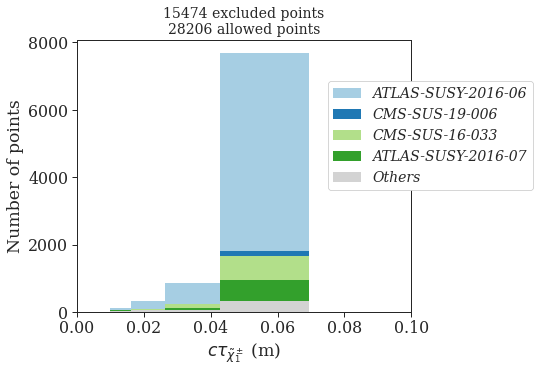

In [74]:
plt.figure(figsize=(6,5))
excluded = dataDFnew[dataDFnew['excluded'] == True]

nbins = np.logspace(-2,2,20)
colors = sns.color_palette("Paired",10)
c_other = 'lightgray'
first = True
for i,ana in enumerate(anas.index):
    x = excluded[excluded['ExptRes.result0.AnalysisID'] == ana]['ctau.1000024']
    if anas[ana] < 1000:
        color = c_other
        if first:
            label = 'Others'
            first = False
        else:
            label = None
    else:
        color = colors[i]
        label = ana
        
    plt.hist(x,nbins,stacked=True,color=color,
                            histtype='bar', label=label,
                            linewidth=0, fill=True)

lgd = plt.legend(bbox_to_anchor=(0.75, 0.85), loc=2, borderaxespad=0.,
                 prop={'family' :'serif','style' : 'italic', 'size' : 14},framealpha=1.)
# plt.yscale('log')
# plt.xscale('log')
plt.xlim(0,0.1)
plt.title('%i excluded points\n%i allowed points' %(len(xExcluded),len(xAllowed)), fontsize=14)
plt.xlabel(r'$c \tau_{\tilde{\chi}_1^\pm}$ (m)')
plt.ylabel('Number of points')
plt.show()